In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier Series

The Fourier series is a way to represent a periodic function as a sum of sines and cosines.  The general form of the Fourier series is:

\begin{equation}
f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(n\omega t) + b_n \sin(n\omega t)
\end{equation}

where $\omega = 2\pi/T$ and $T$ is the period of the function.  The coefficients $a_n$ and $b_n$ are given by:

\begin{equation}
a_n = \frac{2}{T} \int_{t_0}^{t_0+T} f(t) \cos(n\omega t) dt
\end{equation}

\begin{equation}
b_n = \frac{2}{T} \int_{t_0}^{t_0+T} f(t) \sin(n\omega t) dt
\end{equation}

# Discrete Time Series

In practice, we often have a discrete time series.  We can represent the Fourier series in terms of a discrete time series as:

\begin{equation}
f(t) = \frac{a_0}{2} + \sum_{n=1}^{N} a_n \cos(n\omega t) + b_n \sin(n\omega t)
\end{equation}

where $N$ is the number of terms in the Fourier series.  The coefficients $a_n$ and $b_n$ are given by:

\begin{equation}
a_n = \frac{2}{N} \sum_{k=0}^{N_{pts}-1} f_k \cos(n\omega t_k) \Delta t
\end{equation}

\begin{equation}
b_n = \frac{2}{N} \sum_{k=0}^{N_{pts}-1} f_k \sin(n\omega t_k) \Delta t
\end{equation}

where $t_k$ are the discrete time values and $f_k$ are the discrete function values.

### Nyquist Frequency

The Nyquist frequency is the highest frequency that can be represented in a Fourier series.  It is given by:

\begin{equation}
f_{\rm Nyquist} = \frac{1}{2\Delta t}
\end{equation}

where $\Delta t$ is the time step between samples.

### Calculation of Maximum Number of Terms

Suppose that we have a discrete time series with $N_{pts}$ points between $t_{\rm low}$ and $t_{\rm high}$. 

The time step is given by:

\begin{equation}
\Delta t = \frac{t_{\rm high}-t_{\rm low}}{N_{pts}}
\end{equation}

The Nyquist frequency is given by:

\begin{equation}
f_{\rm Nyquist} = \frac{1}{2\Delta t}
\end{equation}

The terms in the Fourier series look like $\cos(n\omega t)$ and $\sin(n\omega t)$.  The frequency $\omega$ is given by:

\begin{equation}
\omega = \frac{2\pi}{T}
\end{equation}

where $T$ is the period of the function.  The frequency $f_n$ is given by:

\begin{equation}
f_n = n \frac{\omega}{2\pi} = \frac{n}{T}
\end{equation}

The Nyquist frequency corresponds to the highest meaningful frequency component.  Thus, we can calculate the maximum number of terms in the Fourier series as:

\begin{equation}
N = n_{\rm max} = T f_{\rm Nyquist}
\end{equation}

Since we do not know, a priori, the period of the function, we can use the maximum time over which we sample the function as the period.  Thus, the maximum number of terms in the Fourier series is given by:

\begin{equation}
N = n_{\rm max} = (t_{\rm high}-t_{\rm low}) f_{\rm Nyquist}
\end{equation}

\begin{equation}
= (t_{\rm high}-t_{\rm low}) \frac{1}{2\Delta t}
\end{equation}

\begin{equation}
= \frac{t_{\rm high}-t_{\rm low}}{2 \frac{t_{\rm high}-t_{\rm low}}{N_{pts}}} = N_{pts}/2
\end{equation}

One should emphasize the difference here between $N$, the maximum number of terms in the Fourier series, and $N_{pts}$, the number of points in the discrete time series.  The maximum number of terms in the Fourier series is determined by the Nyquist frequency and the maximum time over which we sample the function.  The number of points in the discrete time series is determined by the time step and the maximum time over which we sample the function.


In [3]:
npts = 500

# Define the start and end times (30 second time series)
xlow = 0.0    
xhigh = 30.0

x = np.linspace(xlow,xhigh,npts)
dt = (xhigh-xlow)/npts

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

# the Nyquist frequency corresponds to the highest meaningful frequency component
#
# The terms in the Fourier approximation look like cos(n*2*np.pi*t/P) or sin(n*2*np.pi*t/P)
#
# Thus, omega = n*2*np.pi/P = n*2*np.pi/(thigh-tlow)
#       f = omega/(2.0*np.pi) = n/(thigh-tlow)
#
#       f_nyquist = n_max/(thigh-tlow)
#
#       n_max = (thigh-tlow)*f_nyquist

nterms = int((xhigh-xlow)*f_nyquist)

print ('Max terms (from Nyquist) = ',nterms)

aliasing_factor = 2.0
nterms = 250

Nyquist frequency =  8.333333333333334
Max terms (from Nyquist) =  250


In [3]:
# We begin with a base signal frequency, f_signal = 0.16 Hz
# We will add additional frequencies to this base signal
f_signal = 0.16

# Define the angular frequency, omega
w = f_signal*2.0*np.pi

# Define the function
# f(x) = sin(w*x) + 0.8*sin(2.0*w*x) + 0.6*sin(3.0*w*x) + 0.4*sin(4.0*w*x)
#
# So, we will have FOUR frequencies in the signal
#

add_noise = False

fx = []
for i in range(len(x)):
    if (add_noise):
        fx.append(1.0*np.sin(w*x[i]) + 0.8*np.sin(2.0*w*x[i]) + 0.6*np.sin(3.0*w*x[i]) + 0.4*np.sin(4.0*w*x[i]) + 0.1*np.random.randn())
    else:
        fx.append(1.0*np.sin(w*x[i]) + 0.8*np.sin(2.0*w*x[i]) + 0.6*np.sin(3.0*w*x[i]) + 0.4*np.sin(4.0*w*x[i]))
    #fx.append(1.0*np.sin(w*x[i]))
    

Text(0, 0.5, 'f(t)')

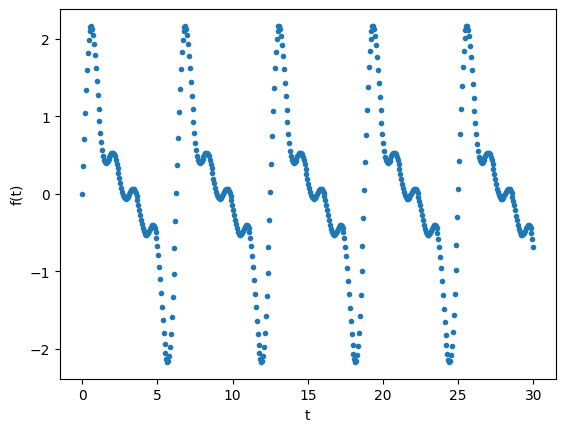

In [4]:
plt.plot(x,fx,'.')
plt.xlabel('t')
plt.ylabel('f(t)')


In [5]:
x2 = np.linspace(xlow,xhigh,npts)
fx_fourier = np.zeros(len(x2))

n = []
an = []
bn = []
pn = []
fn = []

for i in range(nterms+1):
    T = (xhigh-xlow)
    n.append(i)
    fn.append(i/T)

    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0

    for k in range(len(x2)):
        a0sum = a0sum + aliasing_factor/T*fx[k]*dt
        ansum = ansum + aliasing_factor/T*fx[k]*np.cos(2*i*np.pi*x2[k]/T)*dt
        bnsum = bnsum + aliasing_factor/T*fx[k]*np.sin(2*i*np.pi*x2[k]/T)*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
    else:
        an.append(ansum)
        bn.append(bnsum)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*2*np.pi*x2[j]/T)+bn[i]*np.sin(i*2*np.pi*x2[j]/T)        

Data: n = 1.0000, a_n = 0.1233, bn = -0.0145
Data: n = 2.0000, a_n = 0.1329, bn = -0.0334
Data: n = 3.0000, a_n = 0.1563, bn = -0.0673
Data: n = 4.0000, a_n = 0.2368, bn = -0.1758
Data: n = 5.0000, a_n = -0.4413, bn = 0.7644
Data: n = 6.0000, a_n = 0.0298, bn = 0.1300
Data: n = 7.0000, a_n = 0.0968, bn = 0.0648
Data: n = 8.0000, a_n = 0.1696, bn = 0.0260
Data: n = 9.0000, a_n = 0.4209, bn = -0.0618
Data: n = 10.0000, a_n = -0.5257, bn = 0.2447


Text(0, 0.5, 'f(t)')

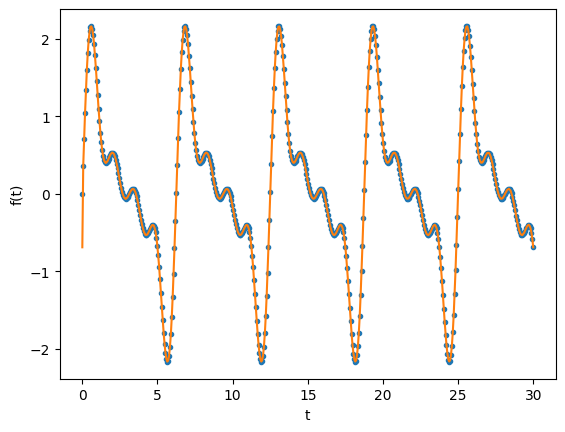

In [6]:
plt.plot(x,fx,'.')
plt.plot(x2,fx_fourier)
plt.xlabel('t')
plt.ylabel('f(t)')
#plt.xlim(0,4*np.pi)

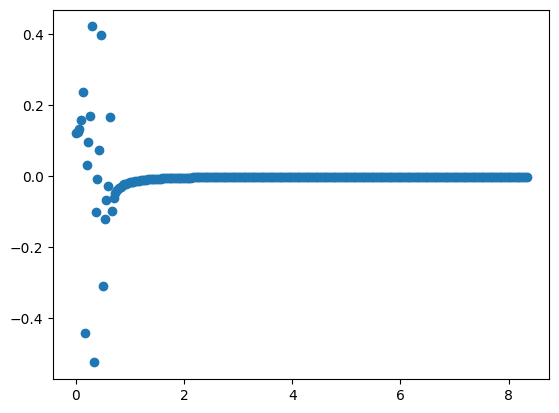

In [7]:
plt.plot(fn,an,'o')
#plt.yscale("log")

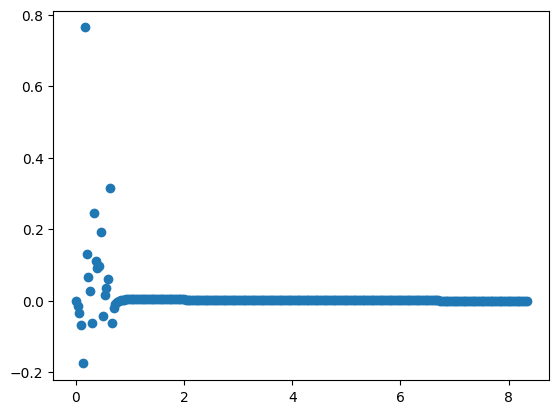

In [8]:
plt.plot(fn,bn,'o')

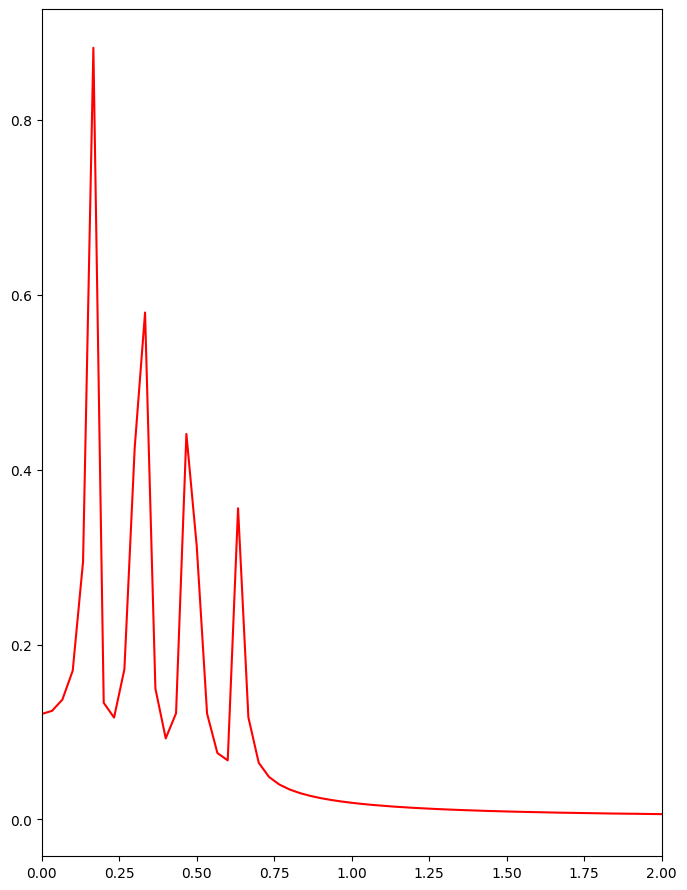

In [9]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11))
axs2.plot(fn,pn,'r-')
axs2.set_xlim(0.0,2)

# Plot vertical lines at the base frequency and its harmonics
plot_f_signal = False
if (plot_f_signal):
    axs2.axvline(x=1.0*f_signal, color='k', linestyle='--')
    axs2.axvline(x=2.0*f_signal, color='k', linestyle='--')
    axs2.axvline(x=3.0*f_signal, color='k', linestyle='--')
    axs2.axvline(x=4.0*f_signal, color='k', linestyle='--')

# Conclusions

The highest frequency in the Fourier series is the Nyquist frequency. The Nyquist frequency is defined by the time-spacing between the samples in the time series, which is in turn given by the sampling frequency of the time series.

The lowest frequency in the Fourier series is determined by the length of the time series.  The lowest frequency is given by the inverse of the length of the time series.

So, these are the "knobs" that we can turn to adjust the frequency range of the Fourier series.

However, if we only include terms up to the Nyquist frequency, we will not be able to accurately represent the function.  We need to include terms up to double the Nyquist frequency than the Nyquist frequency to accurately represent the function.

To account for this, we include an "aliasing factor" (of 2) in the calculation of the Fourier coefficients.
